In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

# Paste the copied path here
file_path = '/content/drive/MyDrive/BML_practical/iris.data'

df = pd.read_csv(file_path) # For CSV files
# Or for other formats, e.g., df = pd.read_excel(file_path) for Excel
print(df.head())

   5.1  3.5  1.4  0.2  Iris-setosa
0  4.9  3.0  1.4  0.2  Iris-setosa
1  4.7  3.2  1.3  0.2  Iris-setosa
2  4.6  3.1  1.5  0.2  Iris-setosa
3  5.0  3.6  1.4  0.2  Iris-setosa
4  5.4  3.9  1.7  0.4  Iris-setosa


In [ ]:
#EXP 2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as wr
wr.filterwarnings('ignore')

In [ ]:
print(df.head())

   5.1  3.5  1.4  0.2  Iris-setosa
0  4.9  3.0  1.4  0.2  Iris-setosa
1  4.7  3.2  1.3  0.2  Iris-setosa
2  4.6  3.1  1.5  0.2  Iris-setosa
3  5.0  3.6  1.4  0.2  Iris-setosa
4  5.4  3.9  1.7  0.4  Iris-setosa


In [ ]:
df.shape

(149, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   5.1          149 non-null    float64
 1   3.5          149 non-null    float64
 2   1.4          149 non-null    float64
 3   0.2          149 non-null    float64
 4   Iris-setosa  149 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
5.1,149.0,5.848322,0.828594,4.3,5.1,5.8,6.4,7.9
3.5,149.0,3.054362,0.435810,2.0,2.8,3.0,3.3,4.4
1.4,149.0,3.773826,1.760543,1.0,1.6,4.4,5.1,6.9
0.2,149.0,1.206040,0.760354,0.1,0.3,1.3,1.8,2.5


In [ ]:
df.columns.tolist()

['5.1', '3.5', '1.4', '0.2', 'Iris-setosa']

In [ ]:
df.nunique()

,0
5.1,35
3.5,23
1.4,43
0.2,22
Iris-setosa,3


In [ ]:
#EXP 3
!pip install pandas
!pip install scikit-learn
!pip install matplotlib
!pip install seaborn

   sepal length  sepal width  petal length  petal width        class
0           4.9          3.0           1.4          0.2  Iris-setosa
1           4.7          3.2           1.3          0.2  Iris-setosa
2           4.6          3.1           1.5          0.2  Iris-setosa
3           5.0          3.6           1.4          0.2  Iris-setosa
4           5.4          3.9           1.7          0.4  Iris-setosa


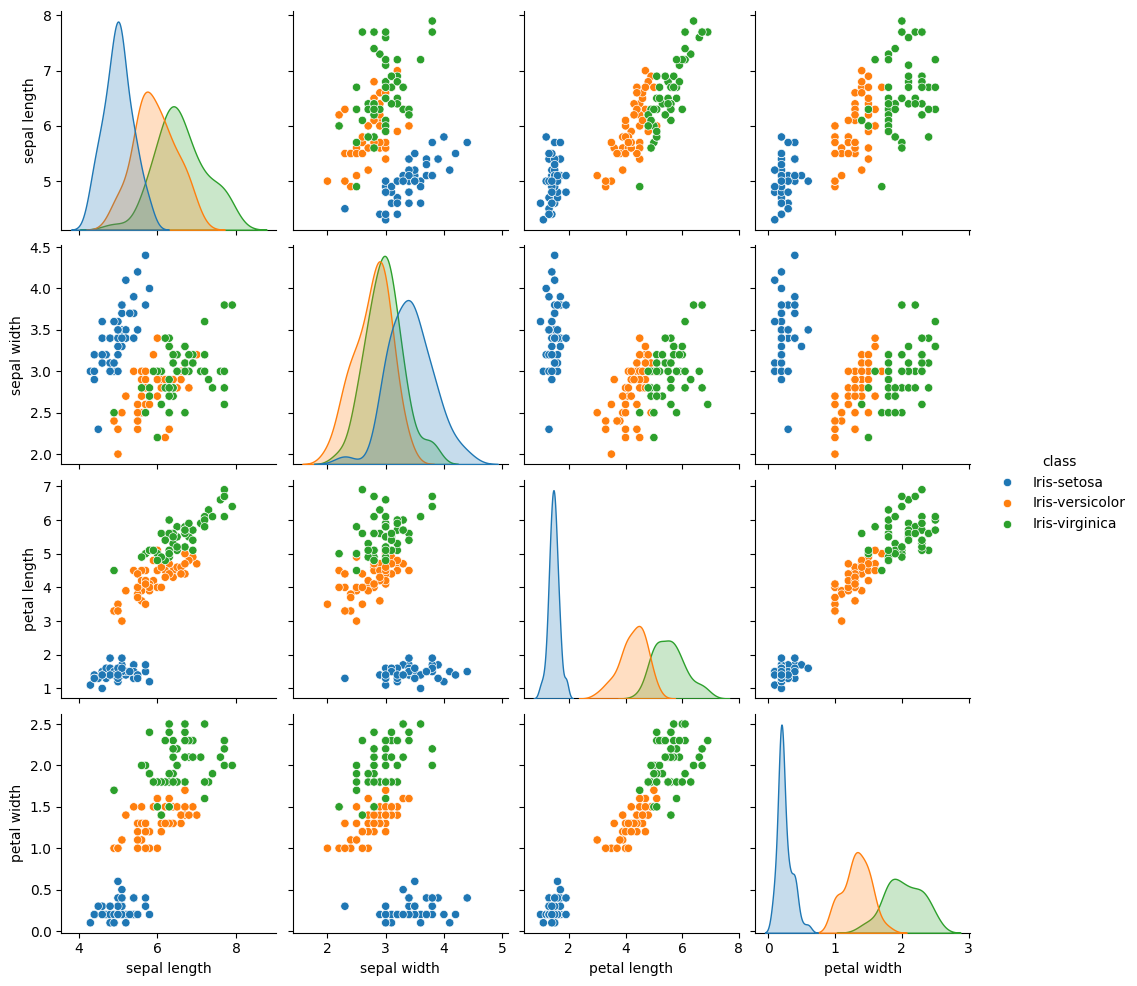

Mean Squared Error: 0.13277575938651545
R^2 Score: 0.8050091647936428
Intercept: 4.284406769388563
Coefficient: [0.4077806]


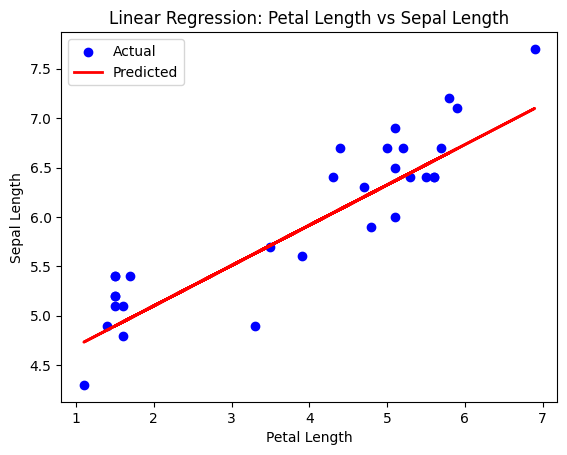

In [ ]:
# Import required libraries
import pandas as pd
import numpy as np # Added numpy import as it's good practice when working with numerical data
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset (using the existing df from previous cell)
# df = pd.read_csv('your_dataset.csv')  # Removed this line

# Rename columns for clarity based on iris.names
df.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'class']

print(df.head())

# Optional: Visualize data
# Since we have multiple numerical columns and a categorical target,
# a pairplot is a good visualization to explore relationships.
sns.pairplot(df, hue='class') # Added hue to color points by class
plt.show()

# Define features (X) and target (y)
# Example: Assuming 'sepal length' is target, and 'petal length' is the feature
# You can change these based on what you want to predict.
X = df[['petal length']]        # Independent variable(s) - using petal length as an example feature
y = df['sepal length']              # Dependent variable - using sepal length as an example target

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate the model
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))

# Print coefficients
print("Intercept:", model.intercept_)
print("Coefficient:", model.coef_)

# Plotting regression line
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.xlabel('Petal Length') # Updated label
plt.ylabel('Sepal Length') # Updated label
plt.title('Linear Regression: Petal Length vs Sepal Length') # Updated title
plt.legend()
plt.show()

Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



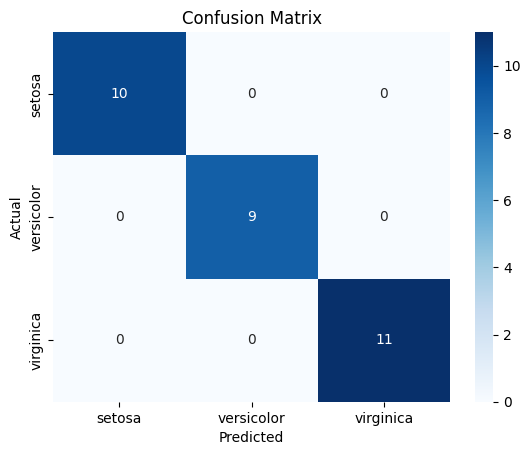

In [ ]:
#EXP 4

# Import libraries
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
iris = datasets.load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train Naïve Bayes model
model = GaussianNB()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
import numpy as np
from collections import Counter

In [ ]:
def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((np.array(point1) - np.array(point2))**2))

Training accuracy: 0.9523809523809523
Testing accuracy: 0.9777777777777777


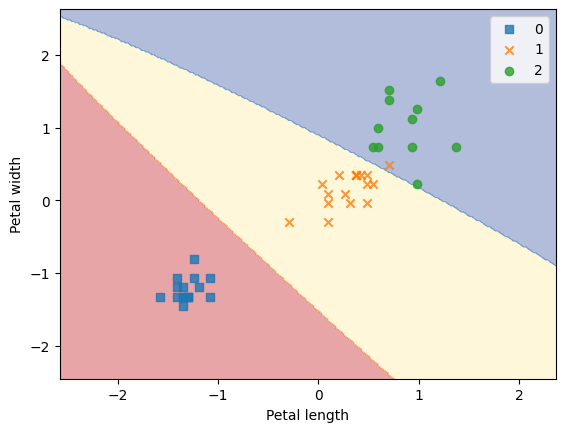

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load dataset
iris_data = datasets.load_iris()
X = iris_data.data[:, [2, 3]]   # Use petal length and width
y = iris_data.target

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Standardize features
standard_scaler = StandardScaler()
standard_scaler.fit(X_train)
X_train_standard = standard_scaler.transform(X_train)
X_test_standard = standard_scaler.transform(X_test)

# Build and train SVM
SVM = SVC(kernel='rbf', random_state=0, gamma=.10, C=1.0)
SVM.fit(X_train_standard, y_train)

# Evaluate accuracy
print('Training accuracy:', SVM.score(X_train_standard, y_train))
print('Testing accuracy:', SVM.score(X_test_standard, y_test))

# Visualize the decision boundary (optional)
def decision_plot(X, y, classifier):
    markers = ('s', 'x', 'o')
    colors = ('red', 'blue', 'green')
    cmap = plt.cm.RdYlBu
    x1min, x1max = X[:, 0].min()-1, X[:,0].max()+1
    x2min, x2max = X[:,1].min()-1, X[:,1].max()+1
    xx1, xx2 = np.meshgrid(np.arange(x1min, x1max, 0.02), np.arange(x2min, x2max, 0.02))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, marker=markers[idx], label=cl)
    plt.xlabel('Petal length')
    plt.ylabel('Petal width')
    plt.legend()
    plt.show()

decision_plot(X_test_standard, y_test, SVM)

In [ ]:
import math

def calculate_entropy(class_probabilities):
    entropy = 0
    for prob in class_probabilities:
        if prob > 0:  # Only consider probabilities greater than 0
            entropy -= prob * math.log2(prob)
    return entropy

class_probabilities = [0.6, 0.4]
entropy_value = calculate_entropy(class_probabilities)
print(f"Entropy of the dataset: {entropy_value}")


Entropy of the dataset: 0.9709505944546686


In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


In [ ]:
#EXP 11th
# Load dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize Random Forest Classifier
rf_model = RandomForestClassifier(
    n_estimators=100,       # number of trees in the forest
    max_depth=None,         # allow trees to grow fully
    bootstrap=True,         # enables bagging
    random_state=42
)

# Train model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [ ]:
#EXP 11th
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred))

Decision Tree Accuracy: 1.0
Random Forest Accuracy: 1.0


Explained variance ratio: [0.72962445 0.22850762]


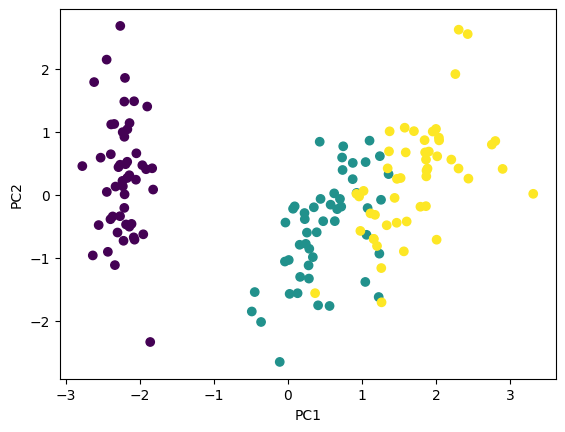

In [ ]:
#EXP 10th
# Import the necessary libraries
import numpy as np
from sklearn.decomposition import PCA

# Load the iris dataset
from sklearn.datasets import load_iris
iris = load_iris()

# Define the predictor variables (X) and the target variable (y)
X = iris.data
y = iris.target

# Standardize the data
X_standardized = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

# Create a PCA object and fit the data
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_standardized)

# Print the explained variance ratio of the selected components
print('Explained variance ratio:', pca.explained_variance_ratio_)

# Plot the transformed data
import matplotlib.pyplot as plt
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [5]:
#12th
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

# Load dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Base weak learner (Decision Tree)
weak_learner = DecisionTreeClassifier(max_depth=1)

# AdaBoost Model
model = AdaBoostClassifier(
    estimator=weak_learner,
    n_estimators=50,
    learning_rate=1.0,
    algorithm='SAMME'
)

# Train model
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("AdaBoost Model Accuracy:", accuracy)

/usr/local/lib/python3.12/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


AdaBoost Model Accuracy: 0.9707602339181286
